In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [3]:
df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


Burada Arizona eyaletinin verilerini inceleyeceğiz ve eksik değerleri uygun yöntemlerle tamamlayacağız.

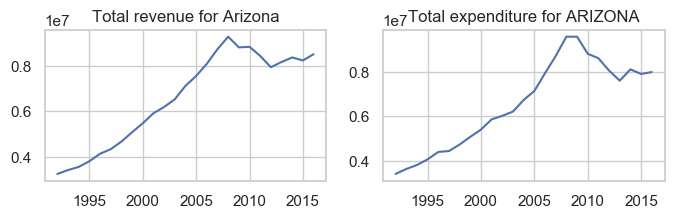

In [27]:
plt.figure(figsize=(8,2))
df_arizona = df[df['STATE']=='ARIZONA']
plt.subplot(1,2,1)
plt.plot(df_arizona['YEAR'], df_arizona['TOTAL_REVENUE'])
plt.title('Total revenue for Arizona')

plt.subplot(1,2,2)
plt.plot(df_arizona['YEAR'], df_arizona['TOTAL_EXPENDITURE'])
plt.title('Total expenditure for ARIZONA')
plt.show()


1. Veriyi incelediğimizde eksik değerin sonda olduğunu tespit ettik. Üstteki grafik ise
bize eksik değerleri ortalamayla onarmanın yanlış olacağını söylüyor. Çünkü yıllara göre
bir artış söz konusu. Dolayısıyla eksik değerlerimizi enterpolasyon ile dolduralım.


In [140]:
df_arizona['TOTAL_REVENUE'].interpolate()
df_arizona['TOTAL_EXPENDITURE'].interpolate()
df_arizona[['TOTAL_REVENUE','TOTAL_EXPENDITURE']].tail()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
1078,8164324.0,7600581.0
1129,8361708.0,8109460.0
1180,8230507.0,7902600.0
1231,8503034.0,7987011.0
1443,8503034.0,7987011.0


In [122]:
df_arizona.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,24.000000,2.600000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.600000e+01,2.500000e+01,2.500000e+01,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01,26.000000,26.000000,26.000000,26.000000
mean,2004.500000,874322.083333,6.651503e+06,7.865178e+05,2.771293e+06,3.019631e+06,6.604990e+06,3.024480e+06,2.073115e+06,334409.875000,...,74519.416667,71993.791667,63244.500000,596437.500000,274507.500000,8.786317e+05,227.217688,273.902179,209.258986,264.253350
std,7.648529,93085.522355,2.025445e+06,3.552691e+05,8.565975e+05,9.160754e+05,1.954180e+06,9.860688e+05,7.505329e+05,94020.649117,...,9961.532124,11494.774537,18052.651957,81237.863178,57892.699749,1.412706e+05,8.373868,5.593414,3.384581,4.200392
min,1992.000000,676297.000000,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,1.000914e+06,164083.000000,...,55433.000000,49081.000000,37410.000000,437127.000000,175210.000000,6.148810e+05,215.253932,265.366278,205.347275,254.799747
25%,1998.250000,809200.500000,4.777928e+06,4.703980e+05,2.000801e+06,2.204097e+06,4.812691e+06,2.091741e+06,1.315931e+06,268163.500000,...,67115.500000,63085.750000,45424.500000,538365.000000,223091.250000,7.665315e+05,218.245697,269.472656,206.391069,261.770402
50%,2004.500000,907901.000000,7.334016e+06,8.354640e+05,2.912629e+06,3.101450e+06,6.934003e+06,3.224647e+06,2.115629e+06,341430.500000,...,76658.500000,77485.500000,69925.000000,620493.000000,307924.000000,9.440270e+05,229.578354,273.523155,208.169725,263.740321
75%,2010.750000,945376.250000,8.412316e+06,1.050228e+06,3.232013e+06,3.904660e+06,8.037749e+06,3.902565e+06,2.858103e+06,401347.000000,...,83078.500000,81364.500000,79757.000000,667057.500000,320719.250000,1.000381e+06,233.970429,278.820849,212.094327,267.648482
max,2017.000000,987332.000000,9.272152e+06,1.579806e+06,4.458836e+06,4.128871e+06,9.581201e+06,4.296503e+06,2.983729e+06,490641.000000,...,86594.000000,84596.000000,84913.000000,687823.000000,354901.000000,1.029470e+06,240.304911,282.919489,215.465952,270.966172


Eksik değerler olmadan revenue ve expenditure değişkenlerinin yıllara göre değişim grafiğini görelim.

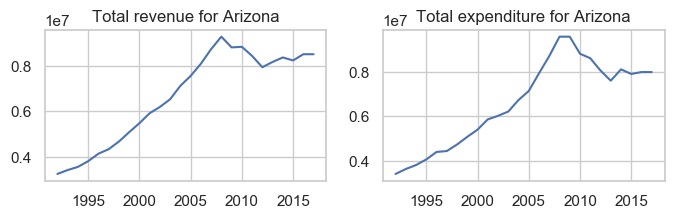

In [45]:
plt.figure(figsize = (8,2))
plt.subplot(1,2,1)
plt.plot(df_arizona['YEAR'], df_arizona['TOTAL_REVENUE'])
plt.title('Total revenue for Arizona')

plt.subplot(1,2,2)
plt.plot(df_arizona['YEAR'], df_arizona['TOTAL_EXPENDITURE'])
plt.title('Total expenditure for Arizona')
plt.show()

Yukarıdaki grafiklerden şunları çıkarabiliriz: Gelir ve giderler arasında doğrusal bir ilişki vardır. Gelir arttıkça harcama artar. Gelir azaldıkça harcama azalır. Gelir ve giderlerin artması ve azalmasında bazı sebepler etkilidir. Mesela buradaki zirveden sonraki düşüş büyük oranda 2008 küresel finans kriziyle ilgilidir.

2. Fazla eksik değer olmadığı için bu grafiklerin önceki grafiklerle neredeyse hiçbir farkı yok. Şimdi 
bu değişkenlerin maksimum ve minimum noktalarına ve yıllarına bakalım.

In [82]:
year_max_exp = df_arizona[df_arizona['TOTAL_EXPENDITURE'] == df_arizona['TOTAL_EXPENDITURE'].max()]['YEAR']
year_max_rev = df_arizona[df_arizona['TOTAL_REVENUE'] == df_arizona['TOTAL_REVENUE'].max()]['YEAR']
year_min_exp = df_arizona[df_arizona['TOTAL_EXPENDITURE'] == df_arizona['TOTAL_EXPENDITURE'].min()]['YEAR']
year_min_rev = df_arizona[df_arizona['TOTAL_REVENUE'] == df_arizona['TOTAL_REVENUE'].min()]['YEAR']


In [85]:
print('Max revenue for Arizona =',df_arizona['TOTAL_EXPENDITURE'].max(),'$', 'Year:', year_max_rev)
print('Min revenue for Arizona =',df_arizona['TOTAL_REVENUE'].min(),'$', 'Year:', year_min_rev )
print('Max expenditure for Arizona =', df_arizona['TOTAL_EXPENDITURE'].max(), '$', 'Year', year_max_exp)
print('Min expenditure for Arizona =',df_arizona['TOTAL_EXPENDITURE'].min(), '$', 'Year:', year_min_exp)

Max revenue for Arizona = 9581201.0 $ Year: 818    2008
Name: YEAR, dtype: int64
Min revenue for Arizona = 3258079.0 $ Year: 2    1992
Name: YEAR, dtype: int64
Max expenditure for Arizona = 9581201.0 $ Year 818    2008
Name: YEAR, dtype: int64
Min expenditure for Arizona = 3401580.0 $ Year: 2    1992
Name: YEAR, dtype: int64


3. Arizona'daki öğrencilerin hangi derslerde başarılı olduğuna bakalım.

Dersleri ayrı ayrı incelediğimizde ders ortalama puan değişkeninin zamanla yükseldiğini görüyoruz. Dolayısıyla burada da enterpolasyon doğru seçim olacaktır. 

In [117]:
df_arizona[['YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']] = df_arizona[['YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].interpolate()

In [118]:
df_arizona[['YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].head()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
2,1992,215.253932,265.366278,206.212716,262.169895
53,1993,215.834434,265.993417,206.291984,262.448330
104,1994,216.414936,266.620556,206.371252,262.726766
155,1995,216.995438,267.247695,206.450520,263.005202
206,1996,217.575940,267.874834,206.529788,263.283638


Eyaletteki okuma ve matematik dersleri ortalamalarına bakalım.

In [121]:
df_arizona[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].mean().head()

AVG_MATH_4_SCORE       227.217688
AVG_MATH_8_SCORE       273.902179
AVG_READING_4_SCORE    209.258986
AVG_READING_8_SCORE    264.253350
dtype: float64

4. Matematik ve okuma notlarının dağılımına bakalım.

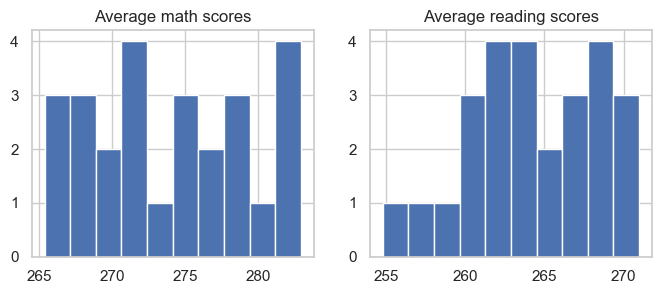

In [136]:
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
plt.hist(df_arizona['AVG_MATH_8_SCORE'])
plt.title('Average math scores')

plt.subplot(1,2,2)
plt.hist(df_arizona['AVG_READING_8_SCORE'])
plt.title('Average reading scores')
plt.show()

Average Reading scores 8 değişkeninin normal dağılımına yakınlığına bakalım.

In [179]:
mean_reading = df_arizona['AVG_READING_8_SCORE']
norm_1 = np.random.normal(mean_reading, 1, df_arizona['AVG_READING_8_SCORE'].shape[0])

mean_math = df_arizona['AVG_MATH_8_SCORE']
norm_2 = np.random.normal(mean_math, 1, df_arizona['AVG_MATH_8_SCORE'].shape[0])


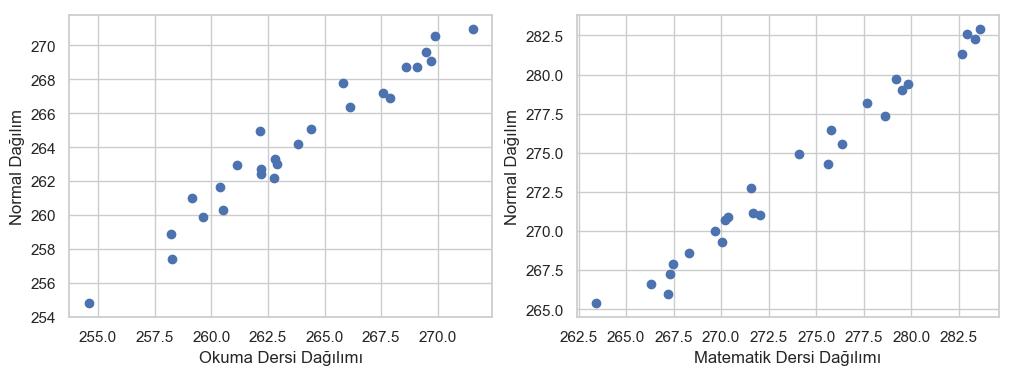

In [185]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(norm_1, df_arizona['AVG_READING_8_SCORE'], "o") 
plt.ylabel('Normal Dağılım') 
plt.xlabel('Okuma Dersi Dağılımı')

plt.subplot(1,2,2)
plt.plot(norm_2, df_arizona['AVG_MATH_8_SCORE'], "o") 
plt.ylabel('Normal Dağılım') 
plt.xlabel('Matematik Dersi Dağılımı')
plt.show()

5. AVG_READING_8_SCORE ve AVG_MATH_8_SCORE değişkenindenki eksik değerleri medyan ile tamamlayalım.

In [200]:
median_filled_reading = df[df['STATE'] == 'ARIZONA']['AVG_READING_8_SCORE'].fillna(df[df['STATE'] == 'ARIZONA']['AVG_READING_8_SCORE'].median())
median_filled_math = df[df['STATE'] == 'ARIZONA']['AVG_MATH_8_SCORE'].fillna(df[df['STATE'] == 'ARIZONA']['AVG_MATH_8_SCORE'].median())

Önceki dağılımla karşılaştırma yapalım

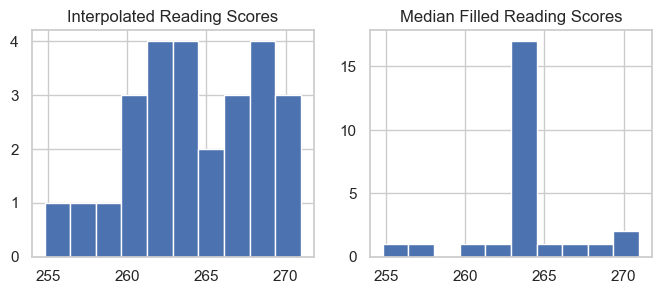

In [205]:
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
plt.hist(df_arizona['AVG_READING_8_SCORE'])
plt.title('Interpolated Reading Scores')

plt.subplot(1,2,2)
plt.hist(median_filled_reading)
plt.title('Median Filled Reading Scores')
plt.show()

Yukarıdaki histogramlardan anlaşıldığı üzere interpolasyon daha uygun. Normal dağılıma daha yakın.